<br><br>
<div style="text-align: center">
<span style="color:black; font-size:50px; font-family: Cambria; text-align: center"><b><i>MultipathLocationEstimator</i> tutorials</b></span>
<br><br>
</div>

<span style=" font-size:19px; font-family: Calibri"><i>MultipathLocationEstimator</i> is an open-source Python library for link-level simulations over 5G digital communication systems, which contains several estimation algorithms for UE <b>(User Equipment)</b> positioning.
</span>


<span style=" font-size:19px; font-family: Calibri">The official documentation can be found <a href="https://github.com/gomezcuba/py5g/blob/dev-locator/MultipathLocationEstimator.py">here</a> </span>


<span style=" font-size:19px; font-family: Calibri">
To understand the use of this class, it has been created two Jupyter notebooks that provides different examples of implementation of the system, from the simplest case to the hardest.
Furthermore, this work is structured in:
</span>


<span style=" font-size:25px; font-family: Calibri"><b>1. <a href=https://github.com/gomezcuba/py5g/blob/dev-locator/Tutorial_1_MultipathLocationEstimator.ipynb>First tutorial: Getting Started with <i>MultipathLocationEstimator</i></a></b>
</span>


<span style=" font-size:20px; font-family: Calibri">2. <a href="#A">Second tutorial: <i>MultipathLocationEstimator</i>, estimation algorythms</a>
</span>
<br><br><br>

<span name="abajo" style="color:black; font-size:33px; font-family: Cambria"><b>Second tutorial: <i>MultipathLocationEstimator</i>, estimation algorithms</b>
</span>

<span style=" font-size:19px; font-family: Calibri">
This second tutorial is focused on understanding how UE position is estimated and computed from the channel parameters. For this purpose, <i>MultipathLocationEstimator</i> class includes different estimation algorithms that will be described along the notebook, as well as a comparison of their performance, time execution and precision in the results.
</span><br><br>

<span style=" font-size:33px; font-family: Cambria"><b>Table of Contents:</b></span>
<br>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri; text-indent: 30px">1. <a href="#1">Problem statement</a>
</span>

<div style = "text-indent: 60px">
    
<span style=" font-size:20px; font-family: Calibri">1.1 <a href="#1.1">Constant offset error model</a>
</span>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri">2. <a href="#2">Geometric system representation</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">3. <a href="#3"><i>MultipathEstimationLocation</i> object</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4. <a href="#4">Solving UE offset orientation</a>
</span>

<div style = "text-indent: 60px">

<span style=" font-size:20px; font-family: Calibri">4.1 <a href="#4.1">Brute force method</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4.2 <a href="#4.2">Linear method</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4.3 <a href="#4.3">Group strategies for $\phi_0$ computation</a>
</span>

<div style = "text-indent: 30px">

<span style=" font-size:20px; font-family: Calibri">5. <a href="#5">Solving UE location</a>
</span> 

<div style = "text-indent: 60px">

<span style=" font-size:20px; font-family: Calibri">5.1 <a href="#5.1">Solving UE location with clock error</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">5.2 <a href="#5.2">Solving UE location from estimated parameters</a>
</span>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri">6. <a href="#6">Performance of the methods</a>
</span> 

<span style=" font-size:20px; font-family: Calibri">7. <a href="#7">References</a>
</span>   
<br>

<a class="anchor" id="1"></a>
<span style="color:black; font-size:33px; font-family: Calibri"><b>1. Problem statement</b></span><br>

<span style=" font-size:19px; font-family: Calibri">The main goal of the <i>MultipathLocationEstimator</i> class is try to recover the UE position trigonometrically, define as ($d_{0x}$, $d_{0y}$), estimating the value of the <b>UE offset orientation</b> ($\phi_0$) from the knowledge of the set of the $AoD$ (<b>Angles of Departure</b>) , $AoA$ (<b>Angles of Arrival</b>) and <b>delays</b> introduced by the multipath channels.
</span>
<br>

<a class="anchor" id="1.1"></a>


<span style="color:black; font-size:28px; font-family: Calibri"><b>1.1 Constant offset error model</b>
</span>
  
<br>
<span style=" font-size:19px; font-family: Calibri"> 
In the previous tutorial, we have talked about how $\phi_0$ could affect $AoA$ measurement. Therefore, receiver’s $AoA$ will be positioned in a different random orientation with regard from the transmission system. 
<br><br>
In this notebook, we will introduce another “constant offset” error, $\tau_e$, which will model the unknown initial propagation ray delay. Fortunately, the relative delay-differences between scattering paths is known. So the differential delay measurements are performed in relation to the incorrect initial delay. What means that instead of knowing the values of delays between the different multipath channels:
\begin{equation}
dels = \tau_i - \tau_0
\end{equation}
the receiver only knowns:
\begin{equation}
dels = \tau_i - (\tau_0 - \tau_e) = dels + \tau_e
\end{equation}
Additionally, in this framework the initial clock offset error $\tau_e$ is due to the unknown LOS delay, and it's the same for all paths. We do not model individual independent noise components in the delay measurements. 
</span>
<br><br>

<span style="color:black; font-size:28px; font-family: Cambria"><b> In this first tutorial you will learn how to: </b></span>
<br>


<div style = "text-indent: 30px">


<span style=" font-size:19px; font-family: Calibri">1. Understand the problem of clock error.</span>
<br>


<span style=" font-size:19px; font-family: Calibri">2. Create an instance of the <i>MultipathLocationEstimator class</i>.</span>
<br>
 
<span style=" font-size:19px; font-family: Calibri">3. Estimate the value of $\phi_0$ (offset orientation).</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri">4. Computing the value of the UE position.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">5. Test and compare the different algorithms that implement the class <i>MultipathLocationEstimator</i>.</span>
<br><br><br>

<br><br>
<span style="color:black; font-size:25px; font-family: Cambria"><b>Imports & Basics </b></span>
<br><b>

In [13]:
#Import MultipathLocationEstimator
import MultipathLocationEstimator

#Import for show the progress bar time execution
import time
from progress.bar import Bar

#Import for the optimization algorithms
import scipy.optimize as opt

#Import to use NumPy arrays
import numpy as np

#Import Pandas
import pandas as pd

#Import to create folders to save the images
import os

#Import for making plots 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Plot size
plt.rcParams["figure.figsize"] = (18, 18)

#Plot page style, rerun this cell if it doesnt work
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#Create folders to save plots
Folder_dir = "Figures"
Folder_tutorial_2_dir = "tutorial_2"
Root_dir = os.path.dirname(os.path.abspath("Tutorial_2_MultipathLocationEstimator.ipyb"))

Folder_dir_path = os.path.join(Root_dir, Folder_dir)
Folder_tutorial_2_dir_path = os.path.join(Folder_dir_path, Folder_tutorial_2_dir)

#Check if the folders doesn't exist
if not os.path.exists(Folder_dir_path):
    os.makedirs(Folder_dir_path)  #### this command for creating directory

if not os.path.exists(Folder_tutorial_2_dir_path):
    os.makedirs(Folder_tutorial_2_dir_path)  #### this command for creating directory

<a class="anchor" id="2.-Geometric-system-representation"></a>

<span style="color:black; font-size:33px; font-family: Cambria"><b> 2. Geometric system representation </b></span>

<div style = "text-indent: 30px">

In [3]:
# Number of scattering paths (number of scatters)
Npath = 10

# Number of total users allocated in the plane
Nuser = 1

In [4]:
# We generate random locations for scatters in a 100m [-50 y 50] square
# We place one scatter in each NLOS path
d_ix = np.random.rand(Npath, Nuser)*100 - 50
d_iy = np.random.rand(Npath, Nuser)*100 - 50

In [5]:
# We generate a random location for the Nuser users
d_0x = np.random.rand(Nuser)*100 - 50
d_0y = np.random.rand(Nuser)*100 - 50

print("d_0x = ",d_0x[0])
print("d_0y = ",d_0y[0])

d_0x =  -47.34012740958926
d_0y =  -27.84716633347829


In [6]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(d_0y/d_0x)
theta_0 = np.mod(theta_0 + np.pi*(d_0x < 0), 2*np.pi)

theta_i = np.arctan(d_iy/d_ix)
theta_i = np.mod(theta_i + np.pi*(d_ix < 0), 2*np.pi)

phi_i = np.arctan((d_iy - d_0y)/(d_0x - d_ix))
phi_i = np.mod(np.pi - phi_i + np.pi*((d_0x - d_ix) < 0), 2*np.pi)

In [7]:
#We generate a random angle for UE offset
phi_0 = np.random.rand(Nuser)*2*np.pi

print("phi_0(rad) = ",phi_0[0], "rad")
print("phi_0(deg) = ",np.rad2deg(phi_0)[0], "º")

phi_0(rad) =  4.032882910854129 rad
phi_0(deg) =  231.0671700623758 º


In [8]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(phi_i - phi_0, 2*np.pi)

In [9]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(d_0y / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

# NLOS path length
l_i = np.abs(d_iy / np.sin(theta_i)) + np.abs((d_iy - d_0y) / np.sin(phi_i))

# NLOS path time delay
tau_i = l_i / c

In [10]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(d_0y/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c 

# NLOS path length
l_i = np.abs(d_iy/np.sin(theta_i)) + np.abs((d_iy - d_0y)/np.sin(phi_i))

# NLOS path time delay
tau_i = l_i/c

In [11]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

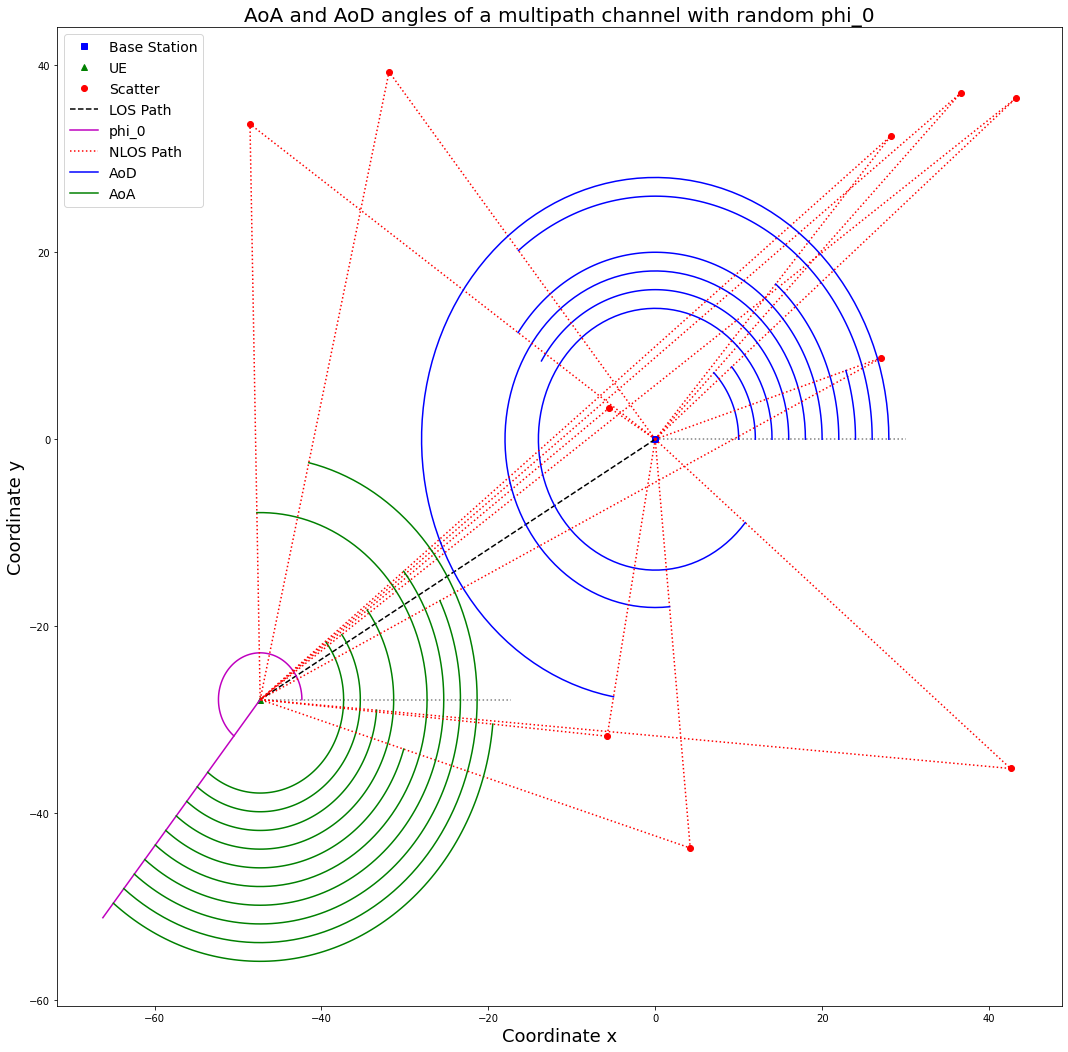

In [14]:
plt.figure(1)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0],":", color="grey")
plt.plot([d_0x, d_0x + circle_scale + Npath*2], [d_0y,d_0y], ":", color="grey")

# Plot phi_0 reference line
plt.plot([d_0x, d_0x + np.cos(phi_0)*(circle_scale + Npath*2)], [d_0y, d_0y + np.sin(phi_0)*(circle_scale + Npath*2)], color="m")

# Plot phi_0 angle
plt.plot(d_0x + (circle_scale/2)*np.cos((phi_0)*t), d_0y + (circle_scale/2)*np.sin((phi_0)*t), color="m", label="phi_0")


for p in range(Npath):
    
    # Plot NLOS paths
    plt.plot([0,d_ix[p],d_0x], [0,d_iy[p],d_0y], ":r", label="NLOS Path")
    
    # Plot AoD angles
    plt.plot(0 + (circle_scale + p*2)*np.cos(AoD[p]*t), 0 + (circle_scale + p*2)*np.sin(AoD[p]*t), color="b", label="AoD")
    
    # Plot AoA angles
    x = np.array([(circle_scale + p*2)*np.cos(AoA[p]*t)])
    y = np.array([(circle_scale + p*2)*np.sin(AoA[p]*t)])
    
    rotated = np.concatenate((x, y), axis=0)
    
    newX = rotated[0,:] * np.cos(phi_0) - rotated[1,:] * np.sin(phi_0)
    newY = rotated[0,:] * np.sin(phi_0) + rotated[1,:] * np.cos(phi_0)
    
    plt.plot(d_0x + newX, d_0y + newY, color="g",label="AoA")

plt.title("AoA and AoD angles of a multipath channel with random phi_0",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_3 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_2.png")

<a class="anchor" id="3"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 3. MultipathEstimationLocation object
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
The parameters of the MultipathEstimationLocation object instance are:
    
<div style = "background-color:#D0ECE7 "><br>
<span style=" font-size:19px; font-family: Calibri">-> <i><b> Npoint </b></i>: int, optional <br> Total point divisions in the minimization range of search.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> RootMethod </b></i>: str, optional <br> Type of solver.
</span>
<br><br>

In [15]:
# Instance of MultipathLocationEstimator object
loc = MultipathLocationEstimator.MultipathLocationEstimator(Npoint = 100, RootMethod = "lm")

<a class="anchor" id="4"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 4. Solving UE offset orientation
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">In this section, we will introduce how to handle and estimate orientation error, $\phi_0$. This constraint can hardly limit the performance of our positioning estimation algorithm due to its randomness and non-linearity. 
<br><br> 
Therefore, to deal with this constraint, we have designed some different methods that can compute its value with high precision in the estimation. From a brute forcing algorithm that looks over all possible points for the range of $\phi_0 \in [0, 2\pi]$, to a more fancy way that tries to search the solution of a non-linear equation using the provided method <i>root()</i> from <i>scipy.optimize</i> python library.
<br><br>
For this purpose, both methods computes the MSE <b>(Minimum Square Error)</b>, defined by <i>feval_wrapper_AllPathsByGroupsFun</i> function. This function, receives the sets of $AoA$, $AoD$ and $delays$ values of different NLOS paths and obtain all the possibles position vectors $(d_0x, d_0y)$ and initial delays $\tau_e$ of the UE. These position vectors are obtained from a linear system equation, which unknowns are passed and specified by different path parameter grouping strategies.
<br><br>
In <a href="#4.3">subsection 4.3</a>, we explain more about the different grouping strategies and how to create and use predefined ones.


</span>

<span style=" font-size:19px; font-family: Calibri">
The parameters of the methods to estimate $\phi_0$ are:
    
<div style = "background-color:#D0ECE7 ">   
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoD </b></i>: ndarray <br> Angles of Departure of the NLOS ray propagation, measured in the BS from de positive x-axis in the non-clockwise.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoA </b></i>: ndarray <br>Angles of Arrival of the NLOS ray propagation, measured in the UE from de positive x-axis in the non-clockwise sense. The value of phi_0 can modify the orientation of the x-axis.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> dels </b></i>: ndarray <br> Delays introduced by the NLOS ray propagations.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> Npoint </b></i>: ndarray <br> Total point divisions in the minimization range of search.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> init_phi0 </b></i>: ndarray <br> Hint about the value of phi0.
</span><br>
    
<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> group_method </b></i>: ndarray, optional <br> Path grouping strategy.
</span>
<br><br>

<a class="anchor" id="4.1"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 4.1 Brute force method
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
The brute force method generates thousands of points in the interval of $[0, 2\pi]$ and picks the one with the
lowest MSE. With this aim, the algorithm obtained the zeros of the given vector function defined by <i>feval_wrapper_AllPathsByGroupsFun</i> and reduces recurrently the solution range till minimize the error in the estimation.
<br><br>
The performance of this estimator will be determined by the grouping methodology, group_method, the number of divisions, Npoint, and the number of total paths, Npath. Hence, increasing these two last variables will increase the accuracy of the method, but with the disadvantage of a higher time in computation. Therefore, it is important to look for an agreement between these parameters and try to search the best for each scenario.
</span>
<br><br>

In [16]:
brute_phi0 = loc.brutePhi0ForAllPaths(AoD[:,0], AoA[:,0], dels[:,0], Npoint = 1000, group_method="drop1")

print("brute_phi0 = ", brute_phi0[0], "rad")

brute_phi0 =  4.031553335237352 rad


<a class="anchor" id="4.2"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 4.2 Linear method
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
On the other hand, the root method obtained the value of offset orientation by finding the zeros of the MSE function, but using the method <i>root()</i> to compute the solution.
<br><br>
This algorithm also can receive an initial guess or hint about what is the value of $\phi_0$, so we can make a large aproximation with the brute force algorithm to make a more acurate estimation. Nowadays, in real UE frameworks there are available some sensors as acelerometers, giroscopes and magnetometers that are capable of measuring orientation angles in the different axis $(x, y, z)$, which could provide the hint value for algorithm initialization.
<br><br>
In this case, the performance of the estimator will be directly determinated by the accuracy of the hint value provided by the brute force algorithm and the RootMethod for computing the roots of the non-linear ecuation sistem.
</span>
<br><br>

In [17]:
phi0_fsolve, _ = loc.solvePhi0ForAllPaths(AoD[:,0], AoA[:,0], dels[:,0], brute_phi0, group_method="drop1", RootMethod = "lm")

print("phi0_fsolve = ", phi0_fsolve[0], "rad")

phi0_fsolve =  4.032882925951554 rad


<a class="anchor" id="4.3"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b>4.3 Group strategies for $\phi_0$ computation
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
In this subsection, we are going to introduce what are group strategies and how they can affect in the estimation performance. These, allows us to group NLOS path parameters ${AoA, AoD, dels}$ for the algorithms iterations, what means how we are going to create our linear system matrix to compute $\phi_0$ value. For this purpose, it's important to follow the constraint that minimal path groups must contain at least 3 different paths.
<br><br>
Group strategies are created by boolean arrays where True values specified the paths that are taken for groups.
</span>

<span style=" font-size:19px; font-family: Calibri">
In <i>MultipathLocationEstimator</i> have been created 3 predefined group strategies:
    
<div style = "background-color:#D0ECE7 "><br>
<span style=" font-size:19px; font-family: Calibri">-> <i><b> gen3PathGroup (group_method = '3path'): </b></i><br>  This function divides the set $\{1, 2, 3, . . ., Npath\}$, where Npath is the total number of NLOS paths into several groups of paths $G1(1, 2, 3), G2(2, 3, 4), G3(3, 4, 5), . . ., Gm(Npath-2, Npath-1, Npath)$. Each group is defined as the result of the combination of 3 paths in a total of $(Npath-2)$ groups.
</span><br>


<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> genDrop1Group (group_method = 'drop1'): </b></i><br> This function divides the set $\{1, 2, 3, . . ., Npath\}$, where Npath is the total number of NLOS paths into many groups of paths $G1, G2 , G3, . . ., Gm$. Each group is defined as the group of all paths except de $m-th$ one. So the $Gm$ group will inclue: $Gm = \{1, . . . ,m-1 , m+1, . . . , Npath\}$.
</span><br> 


<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> genRandomGroup (group_method = 'random'): </b></i><br>This function divides the set $\{1, 2, 3, . . ., Npath\}$, where Npath is the total number of NLOS paths into several groups of paths $G1, G2 , G3, . . ., Gm$$m-th$ one. So the $Gm$ group will include: $Gm = \{1, . . . ,m-1 , m+1, . . . , Npath\}$.
</span><br> 


<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> genRandomGroup (group_method = 'random'): </b></i><br>This function divides the set $\{1, 2, 3, . . ., Npath\}$, where Npath is the total number of NLOS paths into many groups of paths $G1, G2 , G3, . . ., Gm$. So the table will include Nlines groups with random $Npath$ values.
</span>
<br><br> 

<span style=" font-size:19px; font-family: Calibri">
Nevertheless, we can also create our customize path group and pass it to the function in array type as the group_method parameter.
</span>
<br><br>

In [18]:
table_group_3path = loc.gen3PathGroup(Npath)

print(table_group_3path)

[[ True  True  True False False False False False False False]
 [False  True  True  True False False False False False False]
 [False False  True  True  True False False False False False]
 [False False False  True  True  True False False False False]
 [False False False False  True  True  True False False False]
 [False False False False False  True  True  True False False]
 [False False False False False False  True  True  True False]
 [False False False False False False False  True  True  True]]


In [19]:
table_group_drop1 = loc.genDrop1Group(Npath)

print(table_group_drop1)

[[False  True  True  True  True  True  True  True  True  True]
 [ True False  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True  True False  True  True  True  True  True  True]
 [ True  True  True  True False  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True False  True  True  True]
 [ True  True  True  True  True  True  True False  True  True]
 [ True  True  True  True  True  True  True  True False  True]
 [ True  True  True  True  True  True  True  True  True False]]


In [20]:
Nlines = 5
table_group_random = loc.genRandomGroup(Npath, Nlines)

print(table_group_random)

[[ True  True  True False False False False False False False]
 [False  True  True  True False False False False False False]
 [False False  True  True  True False False False False False]
 [False False False  True  True  True False False False False]
 [False False False False  True  True  True False False False]
 [False False False False False  True  True  True False False]
 [False False False False False False  True  True  True False]
 [False False False False False False False  True  True  True]]


In [21]:
# Number of points to search the phi_0 angle
Npoint = 1000
phi_0_search = np.linspace(0, 2*np.pi, Npoint).reshape(-1, 1)

In [22]:
# Compute all posible UE positions for phi_0_search range
x0_3path = np.zeros((Npoint,Npath))
y0_3path = np.zeros((Npoint,Npath))

for ct in range(phi_0_search.size):
    for gr in range(table_group_3path.shape[0]):
        (x0_3path[ct,gr], y0_3path[ct,gr],  _, _, _) = loc.computeAllPaths(AoD[table_group_3path[gr, :]], AoA[table_group_3path[gr, :]], dels[table_group_3path[gr, :]], phi0_est=phi_0_search[ct])

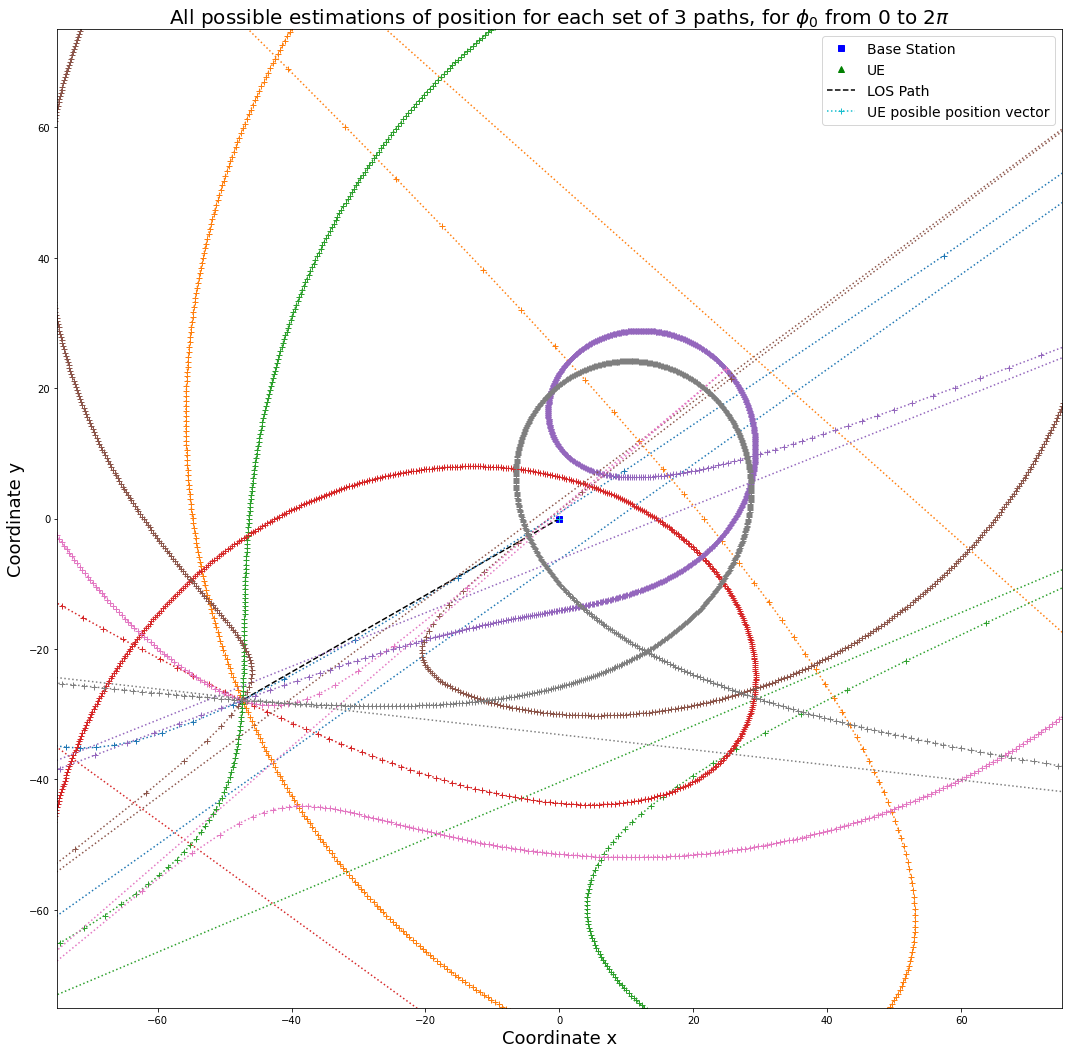

In [23]:
plt.figure(2)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot LOS path
plt.plot([0, d_0x], [0, d_0y], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
plt.plot(x0_3path, y0_3path, ":+", label="UE posible position vector")

# Limits because curves diverge sharply
plt.axis([-75,75,-75,75])

plt.title("All possible estimations of position for each set of 3 paths, for $\phi_0$ from 0 to 2$\pi$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_1 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_3_1.png")

<span style=" font-size:19px; font-family: Calibri">The figure above, shows all the solutions described by the different possible positions of the UE, function of the range of values of $\phi_0$. Each curve describes one system of linear equations obtained from the parameters values of 3 different multipath channels. As we can see in the plot, all curves cross at the same point, where the UE is located. Hence, at that point the value of the offset orientation is obtained.
<br><br>
Nevertheless, this grouping methodology presents several disadvantages. For some cases it's not accurate enough and diverges sharply when is far from the solution. 
</span>
<br><br>

In [24]:
# Compute all posible UE positions for phi_0_search range
x0_drop1 = np.zeros((Npoint,Npath))
y0_drop1 = np.zeros((Npoint,Npath))
tauE_drop1 = np.zeros((Npoint,Npath))

for ct in range(phi_0_search.size):
    for gr in range(table_group_drop1.shape[0]):
        (x0_drop1[ct,gr], y0_drop1[ct,gr], tauE_drop1[ct,gr], _, _) = loc.computeAllPaths(AoD[table_group_drop1[gr, :]], AoA[table_group_drop1[gr, :]], dels[table_group_drop1[gr, :]], phi0_est=phi_0_search[ct])

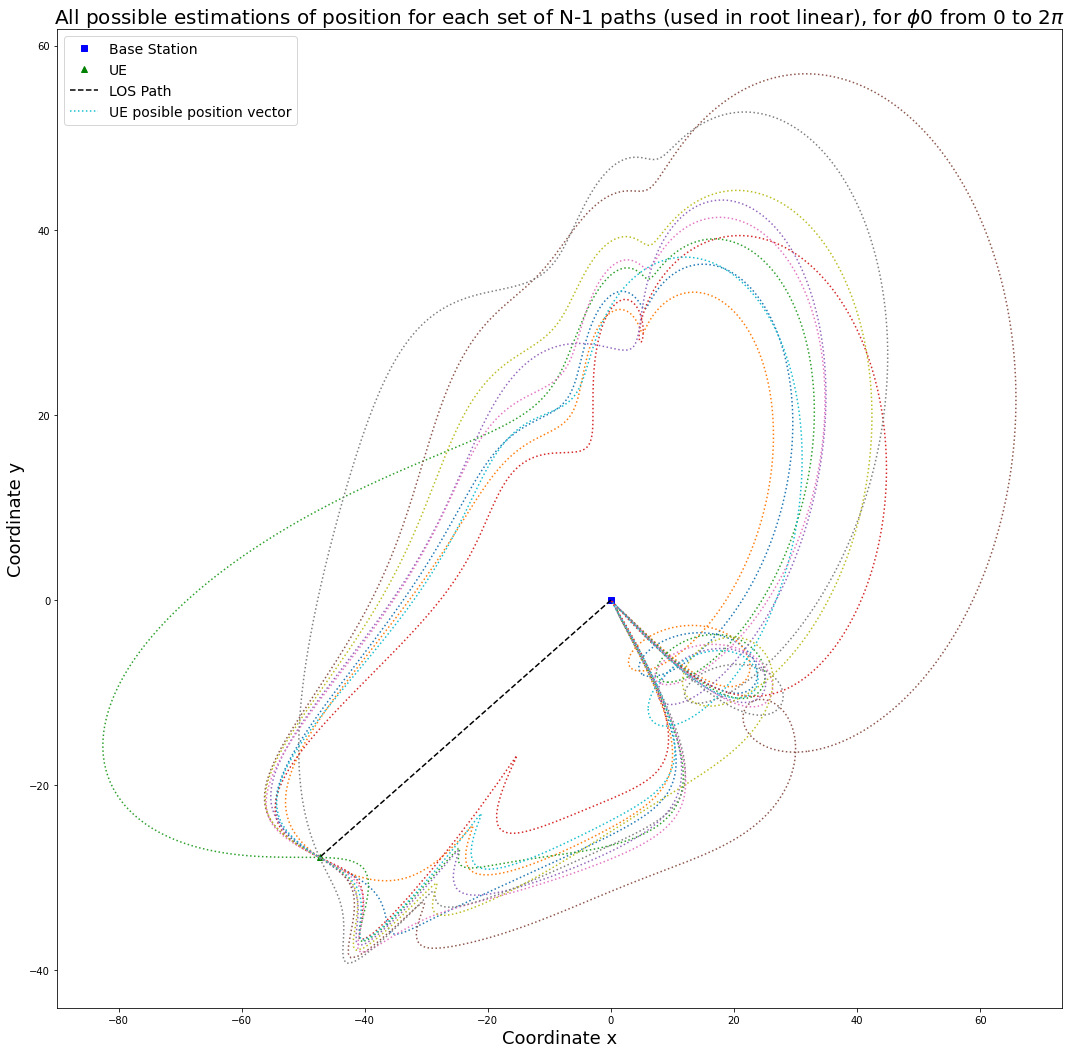

In [25]:
plt.figure(3)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot LOS path
plt.plot([0, d_0x], [0, d_0y], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
plt.plot(x0_drop1, y0_drop1, ":", label="UE posible position vector")

plt.title("All possible estimations of position for each set of N-1 paths (used in root linear), for $\phi0$ from 0 to 2$\pi$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_3_1 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_3_2.png")

<span style=" font-size:19px; font-family: Calibri">As we have seen before, for the 3-paths method functions, here the curves obtained shows a more elegant solution to compute UE position. Furthermore, this method presents several advantages. It's more accurate and curves diverges less sharply.
</span>
<br><br>

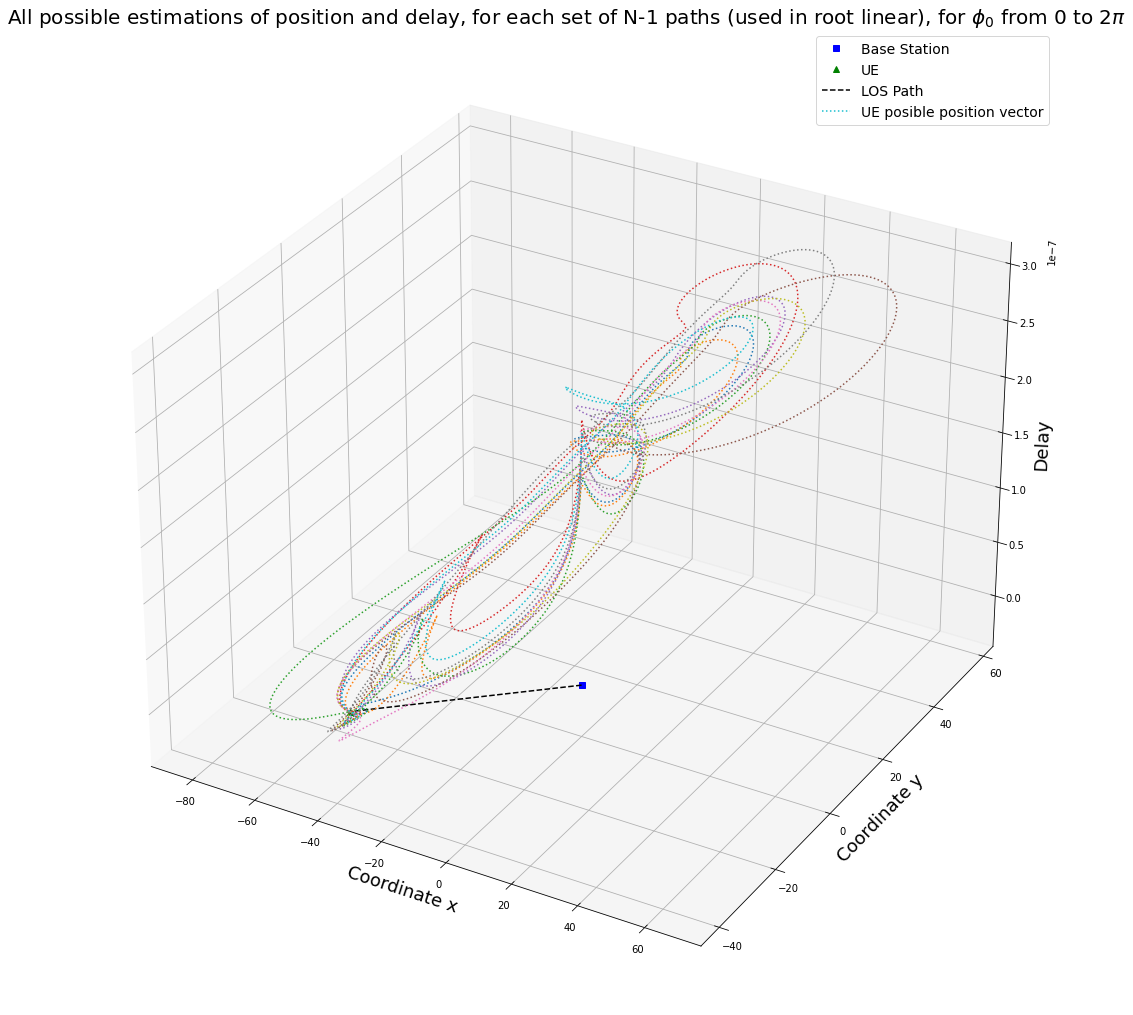

In [27]:
plt.figure(4)
ax = plt.axes(projection = "3d")

# Plot the Base Station
ax.plot3D([0], [0], [0], "sb", label="Base Station")

# Plot the UE
ax.plot3D(d_0x, d_0y, [0], "^g", label="UE")

# Plot LOS path
ax.plot3D([0, d_0x], [0, d_0y], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
for gr in range(Npath):
    ax.plot3D(x0_drop1[:,gr], y0_drop1[:,gr], tauE_drop1[:,gr], ':', label="UE posible position vector")
    
plt.title("All possible estimations of position and delay, for each set of N-1 paths (used in root linear), for $\phi_0$ from 0 to 2$\pi$", fontsize=20)
ax.set_xlabel("Coordinate x", fontsize=18)
ax.set_ylabel("Coordinate y", fontsize=18)
ax.set_zlabel("Delay", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_3_2 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_3_3.png")

<span style=" font-size:19px; font-family: Calibri">Here, we present a more clear figure of how UE possibles positions are obtained in function of the value of $\phi_0$. We have added one more dimension, related with delays between multipath channel paths. We can see again that all curves converge to the same point, where the UE is located. 
</span>
<br><br>

<a class="anchor" id="5"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 5. Solving UE location
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
Once we have understood all parameters and constraints of our system model, it's time to perform UE location.
For this purpose, <i>MultipathLocationEstimator</i> includes several methods that help to achieve this task. All of them are wrapped in one parametric function that helps the user to make use of the algorithms, <i>computeAllLocationsFromPaths</i>. This, returns the estimated position of the UE and scatters along the multipath channels and computes the estimation for the orientation offset $\phi_0$.
<br><br>
This first part, will be focused in how to use the different method options and how it performs the UE position for a non-real channel measurements. Afterwards, we are going to introduce some delay error in the $dels$ estimation and some noise in the $AoA$ and $AoD$ measurements to test how accuracy and robust is the algorithm.
<br><br>
With this aim, we generate $Nuser = 50$ UE positions $(d_0x, d_0y)$ and $Npath × Nuser = 7×50$ reflector locations $(d_{ix}, d_{iy})$, both randomly uniformly distributed in a square of size of $(100 * 100) m$, that simulates the plane where UE, BS and scatter are placed. The terminal orientation is also random $\phi_0\sim U(0, 2\pi)$.
</span>

<span style=" font-size:19px; font-family: Calibri">The call to the UE position algorithm is: <br></span>
<span style=" font-size:20px; font-family: Calibri"><i>'computeAllLocationsFromPaths(AoD=AoD, AoA=AoA, dels=dels, method='fsolve', hint_phi0=None)'</i>
</span>
<br>

<span style=" font-size:19px; font-family: Calibri">
The parameter '<b>method</b>' options:

<div style = "background-color:#D0ECE7 ">   
<span style=" font-size:19px; font-family: Calibri">-> <i><b> 'brute' </b></i><br><i>brutephi0ForAllPaths()</i> to estimate $\phi_0$.
</span><br>

<br> 
<span style=" font-size:19px; font-family: Calibri">-> <i><b> 'fsolve' </b></i><br><i>solvephi0ForAllPaths()</i> to estimate $\phi_0$.
</span>
<br><br>

In [28]:
# Number of scattering paths (number of scatters)
Npath = 20

# Number of total users allocated in the plane
Nuser = 100

In [29]:
# We generate random locations for scatters in a 100m [-50 y 50] square
# We place one scatter in each NLOS path
d_ix = np.random.rand(Npath, Nuser)*100 - 50
d_iy = np.random.rand(Npath, Nuser)*100 - 50

# We generate a random location for Nuser users
d_0x = np.random.rand(1, Nuser)*100 - 50
d_0y = np.random.rand(1, Nuser)*100 - 50

In [30]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(d_0y/d_0x)
theta_0 = np.mod(theta_0 + np.pi*(d_0x < 0), 2*np.pi)

theta_i = np.arctan(d_iy/d_ix)
theta_i = np.mod(theta_i + np.pi*(d_ix < 0), 2*np.pi)

phi_i = np.arctan((d_iy - d_0y)/(d_0x - d_ix))
phi_i = np.mod(np.pi - phi_i + np.pi*((d_0x - d_ix) < 0), 2*np.pi)

In [31]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(d_0y / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

# NLOS path length
l_i = np.abs(d_iy / np.sin(theta_i)) + np.abs((d_iy - d_0y) / np.sin(phi_i))

# NLOS path time delay
tau_i = l_i / c

In [32]:
# We generate a random angle for the offset
phi_0 = np.random.rand(1,Nuser)*2*np.pi

In [33]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(phi_i - phi_0, 2*np.pi)

In [34]:
dels = tau_i - tau_0 

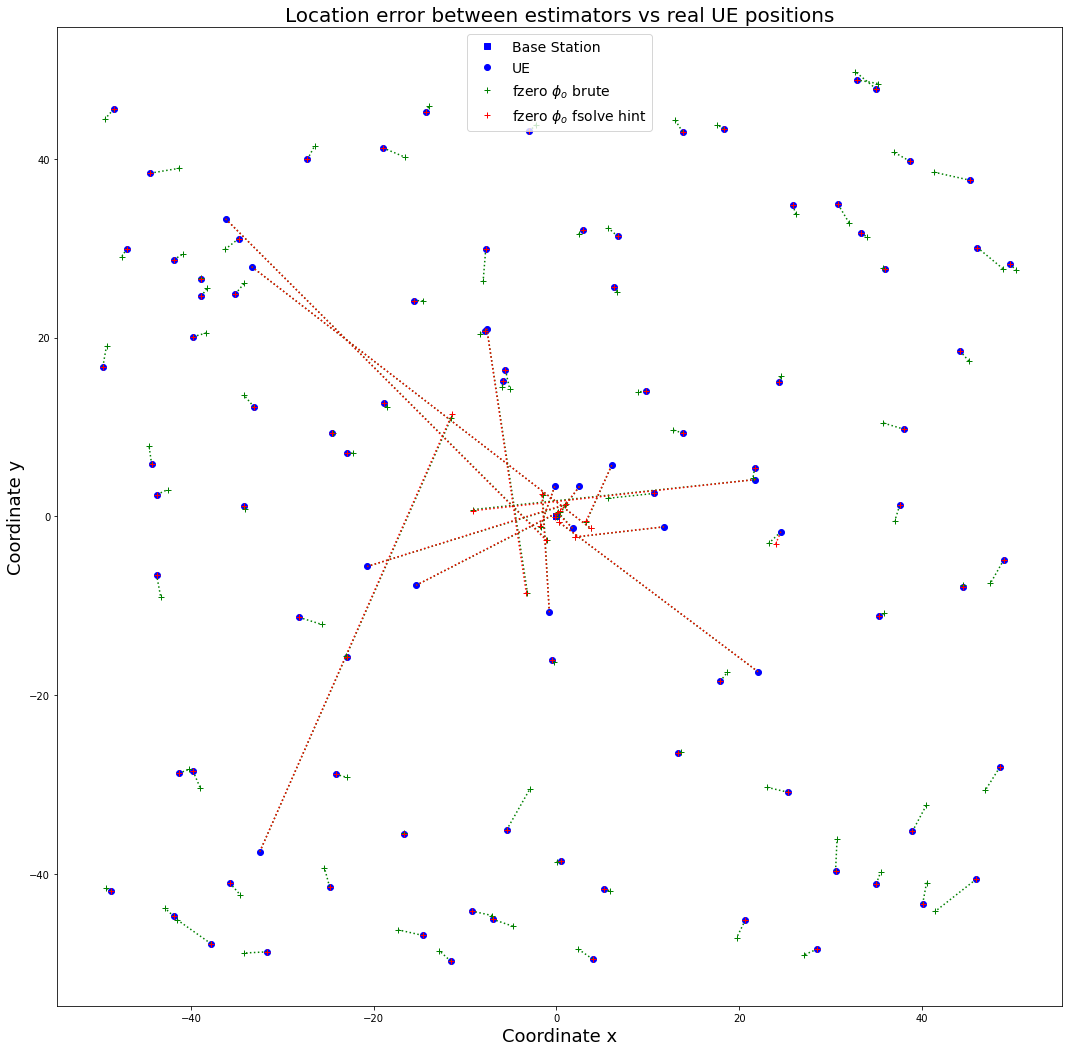

In [35]:
plt.figure(5)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the User
plt.plot(d_0x, d_0y,"ob",label="UE")

for ue in range(Nuser):
    
    (phi0_brute, d_0x_brute, d_0y_brute,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], Npoint=100, phi0_method="brute", group_method='drop1')    
    plt.plot(d_0x_brute, d_0y_brute,"+g",label="fzero $\phi_o$ brute")
    plt.plot([d_0x[:,ue], d_0x_brute], [d_0y[:,ue], d_0y_brute], ":g")

    (phi0_fsolve, d_0x_fsolve, d_0y_fsolve,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=phi0_brute, phi0_method="fsolve", group_method='drop1', RootMethod = "lm")    
    plt.plot(d_0x_fsolve, d_0y_fsolve,"+r",label="fzero $\phi_o$ fsolve hint")
    plt.plot([d_0x[:,ue],d_0x_fsolve], [d_0y[:,ue],d_0y_fsolve], ":r")

plt.title("Location error between estimators vs real UE positions",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_5_1_B image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_5.png")

<a class="anchor" id="5.1"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 5.1 Solving UE location with clock error
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
Next, we use the methods explained in previous sections but introducing now some errors in channel parameters measurements to simulate possibles errors introduced in the position estimation. For this, you can go back to <a href="#1.1">section 1.1</a> to refresh clock offset error basics.
<br><br>
For this part, we use the same UE, BS and scatter map. Additionally, clock error is randomly distributed as $\tau_e\sim U(0, 40ns)$.
</span>

In [36]:
#delay estimation error
clock_error=(40/c)*np.random.rand(1,Nuser)

dels = tau_i - tau_0 + clock_error

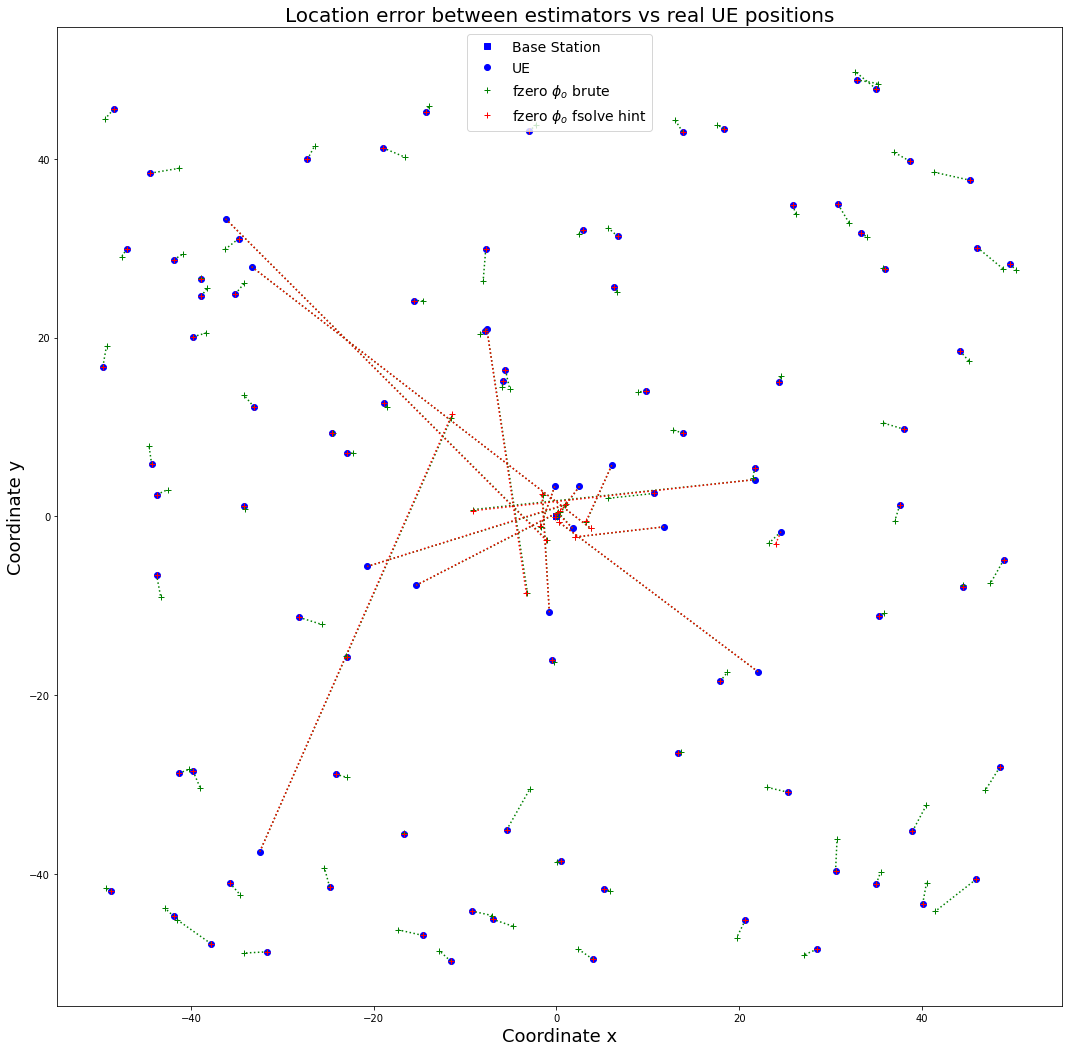

In [37]:
plt.figure(5)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the User
plt.plot(d_0x, d_0y,"ob",label="UE")

for ue in range(Nuser):
    
    (phi0_brute, d_0x_brute, d_0y_brute,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], Npoint=100, phi0_method="brute", group_method='drop1')    
    plt.plot(d_0x_brute, d_0y_brute,"+g",label="fzero $\phi_o$ brute")
    plt.plot([d_0x[:,ue], d_0x_brute], [d_0y[:,ue], d_0y_brute], ":g")

    (phi0_fsolve, d_0x_fsolve, d_0y_fsolve,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=phi0_brute, phi0_method="fsolve", group_method='drop1', RootMethod = "lm")    
    plt.plot(d_0x_fsolve, d_0y_fsolve,"+r",label="fzero $\phi_o$ fsolve hint")
    plt.plot([d_0x[:,ue],d_0x_fsolve], [d_0y[:,ue],d_0y_fsolve], ":r")

plt.title("Location error between estimators vs real UE positions",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_5_1_B image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_5_1.png")

<span style=" font-size:19px; font-family: Calibri">With this, we can prove that our solution is implicitly robust to constant clock offset errors.
</span>
<br><br>

<a class="anchor" id="5.2"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 5.2 Solving UE location from estimated parameters
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
At this point, all seems to work perfectly, and the algorithms looks to perform very well the UE position, but we have not taken in account possibles errors that can be taken from the measured of $AoA$, $AoD$ and $dels$ channel parameters.
<br><br>
    For this last section part, we introduce an additive noise term to the multipath components. So, instead of known $\{\theta_i, \phi_i, \tau_i\}$ we used the set of values $\{\theta_i + E\theta_i, \phi_i + E\phi_i, \tau_i + E\tau_i\}$, where the errors are modelled as:
\begin{equation}
E\theta_i, E\phi_i \sim N\left(0, \left(\frac{2\pi}{2N_a}\right)^2\right)
\end{equation}
with Na = 256, a tuning parameter intended to represent the number of antennas of a linear array. <br><br>Moreover, the delay estimation error is modeled as:
\begin{equation}
E\tau_i \sim N(0, T_s^2) 
\end{equation}
where 
\begin{equation}
T_s = \left(\frac{1}{B}\right) = 2.5 ns = \left(\frac{1}{400 MHz}\right) 
\end{equation} 
intended to represent the discrete equivalent channel sample period.
</span>


In [38]:
Nanterr = 256

AoD = np.mod(theta_i+np.random.rand(Npath,Nuser)*2*np.pi/Nanterr,2*np.pi)
AoA = np.mod(phi_i - phi_0+np.random.rand(Npath,Nuser)*2*np.pi/Nanterr,2*np.pi)

In [39]:
Tserr = 2.5e-9

#delay estimation error
clock_error = (40/c)*np.random.rand(1,Nuser)

#delay estimation error
del_error = (Tserr)*np.random.randn(Npath,Nuser)

dels = tau_i - tau_0 + clock_error + del_error

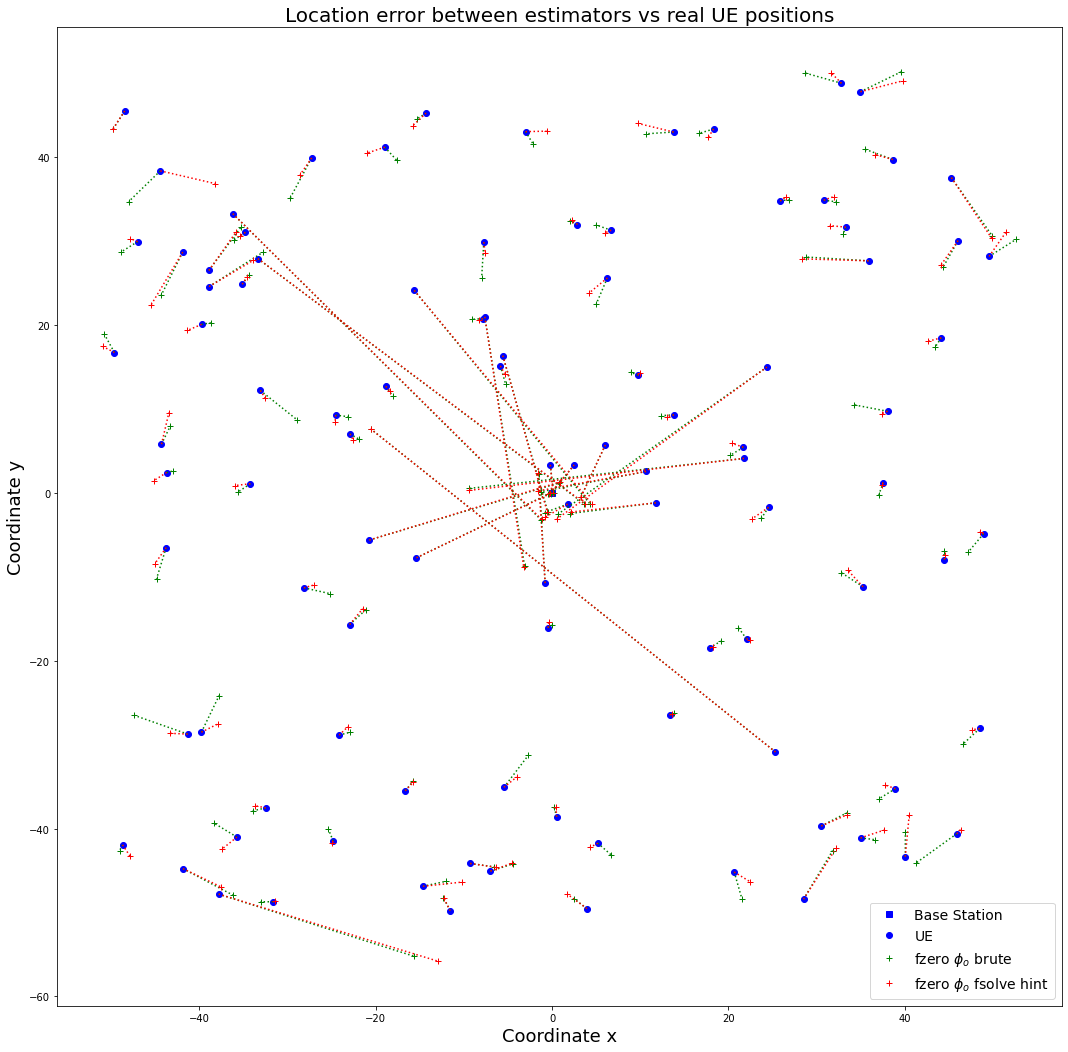

In [40]:
plt.figure(5)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the User
plt.plot(d_0x, d_0y,"ob",label="UE")

for ue in range(Nuser):
    
    (phi0_brute, d_0x_brute, d_0y_brute,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], Npoint=100, phi0_method="brute", group_method='drop1')    
    plt.plot(d_0x_brute, d_0y_brute,"+g",label="fzero $\phi_o$ brute")
    plt.plot([d_0x[:,ue], d_0x_brute], [d_0y[:,ue], d_0y_brute], ":g")

    (phi0_fsolve, d_0x_fsolve, d_0y_fsolve,_,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=phi0_brute, phi0_method="fsolve", group_method='drop1', RootMethod = "lm")    
    plt.plot(d_0x_fsolve, d_0y_fsolve,"+r",label="fzero $\phi_o$ fsolve hint")
    plt.plot([d_0x[:,ue],d_0x_fsolve], [d_0y[:,ue],d_0y_fsolve], ":r")

plt.title("Location error between estimators vs real UE positions",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_5_1_B image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_5_2.png")

<span style=" font-size:19px; font-family: Calibri">
This figure shows true UE locations, blue points, versus algorithm location estimations, red and green crosses. Here, there are two remarkable observations concerning this map. First, it seems that there is a tendency to either estimate the location very closely, or commit a very large error when the estimation is much closer to the BS than the true location. Second, the errors almost always drift the estimated location towards the centre, in the direction of the BS location at $(0, 0)$, and not in arbitrary random directions.
</span>

<a class="anchor" id="6"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria"><b> 6. Performance of the methods </b></span>
<br>


brute |################################| 100/100
fsolve_drop1 |################################| 100/100
fsolve_drop1_hint |################################| 100/100
fsolve_3path |################################| 100/100
fsolve_3path_hint |################################| 100/100
fsolve_random |################################| 100/100


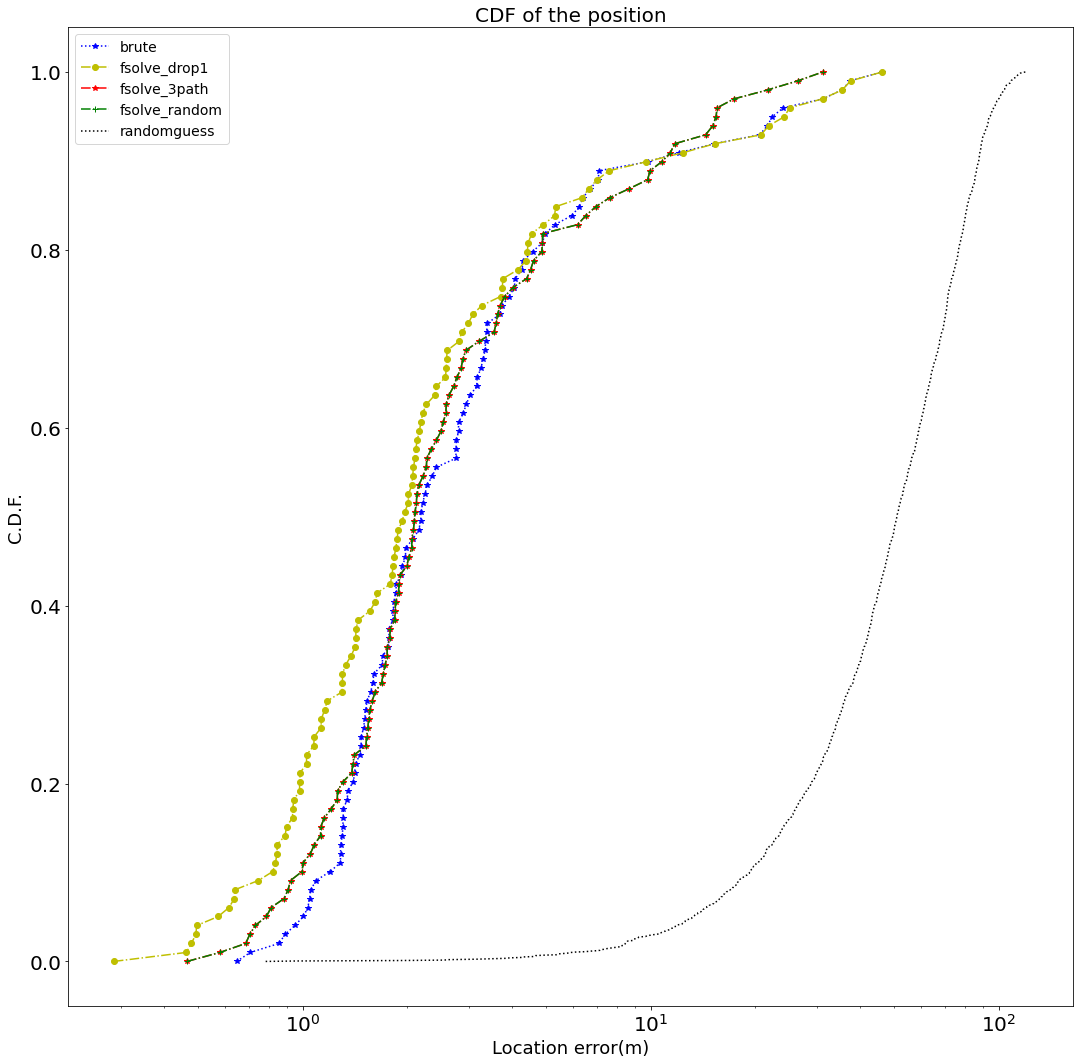

In [41]:
phi0_brute = np.zeros((1,Nuser))
phi0_drop1 = np.zeros((1,Nuser))
phi0_drop1_hint = np.zeros((1,Nuser))
phi0_3path = np.zeros((1,Nuser))
phi0_3path_hint = np.zeros((1,Nuser))
phi0_random = np.zeros((1,Nuser))

tauerr_brute = np.zeros((1,Nuser))
tauerr_drop1 = np.zeros((1,Nuser))
tauerr_3path = np.zeros((1,Nuser))
tauerr_random = np.zeros((1,Nuser))

d_0x_est = np.zeros((1,Nuser))
d_0y_est = np.zeros((1,Nuser))

plt.figure(6)

# brute position solver
t_start = time.time()

bar = Bar("brute", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_brute[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_brute[:,ue], _, _, _) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], Npoint=100, phi0_method="brute", group_method='drop1')
    bar.next()
    
bar.finish()
error_brute = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_brute = time.time() - t_start
plt.semilogx(np.sort(error_brute).T, np.linspace(0, 1, error_brute.size), ':b*', label="brute")

# fsolve_drop1 position solver
t_start = time.time()

bar = Bar("fsolve_drop1", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_drop1[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_drop1[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method='drop1', RootMethod = "lm") 
    bar.next()
bar.finish()

error_drop1 = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve = time.time() - t_start
plt.semilogx(np.sort(error_drop1).T,np.linspace(0,1,error_drop1.size),'-.oy', label="fsolve_drop1")

# fsolve_drop1 hint
t_start = time.time()

bar = Bar("fsolve_drop1_hint", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_drop1_hint[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_drop1[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=phi0_drop1[:,ue], phi0_method="fsolve", group_method='drop1', RootMethod = "lm") 
    bar.next()
bar.finish()

error_drop1 = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_hint = time.time() - t_start

# fsolve_3path position solver
t_start = time.time()

bar = Bar("fsolve_3path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_3path[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_3path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method='3path', RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_3path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_3path = time.time() - t_start
plt.semilogx(np.sort(error_fsolve_3path).T,np.linspace(0,1,error_fsolve_3path.size),'-.r*', label="fsolve_3path")

# fsolve_3path hint
t_start = time.time()

bar = Bar("fsolve_3path_hint", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_3path_hint[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_3path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=phi0_3path[:,ue], phi0_method="fsolve", group_method='3path', RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_3path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_3path_hint = time.time() - t_start

# fsolve_random position solver
t_start = time.time()
bar = Bar("fsolve_random", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_random[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_random[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method='random', RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_random = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_random = time.time() - t_start
plt.semilogx(np.sort(error_fsolve_random).T,np.linspace(0,1,error_fsolve_random.size),'-.g+', label="fsolve_random")

error_dumb = np.sqrt(np.abs(d_0x - d_ix)**2 + np.abs(d_0y - d_iy)**2).reshape((-1))
plt.semilogx(np.sort(error_dumb).T, np.linspace(0,1,error_dumb.size),':k', label="randomguess")

plt.title("CDF of the position",  fontsize=20)
plt.xlabel('Location error(m)', fontsize=18)
plt.ylabel('C.D.F.', fontsize=18)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save CDF_loc_error image
plt.savefig(Folder_tutorial_2_dir_path + "/CDF_loc_error.png")

/tmp/ipykernel_12079/159382593.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


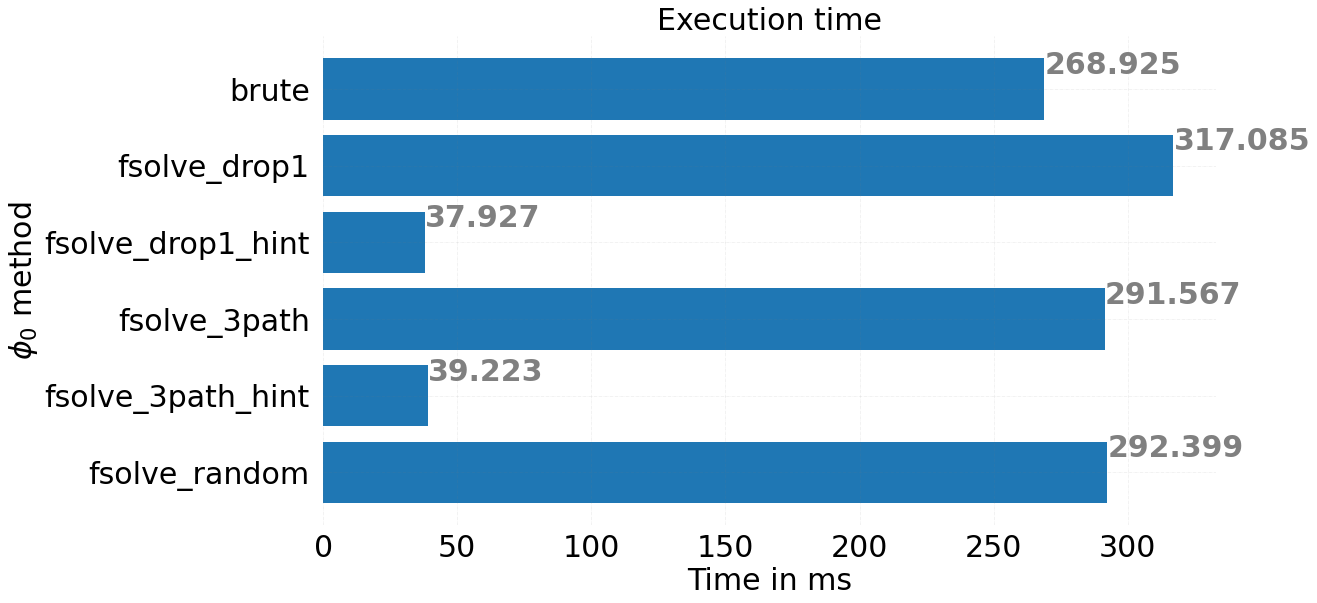

In [42]:
paths = ['brute', 'fsolve_drop1', 'fsolve_drop1_hint', 'fsolve_3path', 'fsolve_3path_hint', 'fsolve_random']

error = [1000*t_run_brute/Nuser, 1000*t_run_fsolve/Nuser, 1000*t_run_fsolve_hint/Nuser, 1000*t_run_fsolve_3path/Nuser,
        1000*t_run_fsolve_3path_hint/Nuser, 1000*t_run_fsolve_random/Nuser]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(paths, error)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.01, i.get_y()+0.2,
			str(round((i.get_width()), 3)),
			fontsize = 30, fontweight ='bold',
			color ='grey')

plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 

plt.title("Execution time",  fontsize=30)
plt.xlabel("Time in ms",  fontsize=30)
plt.ylabel("$\phi_0$ method",  fontsize=30)

plt.savefig(Folder_tutorial_2_dir_path + "/Tiempos_paths_ejec.png")

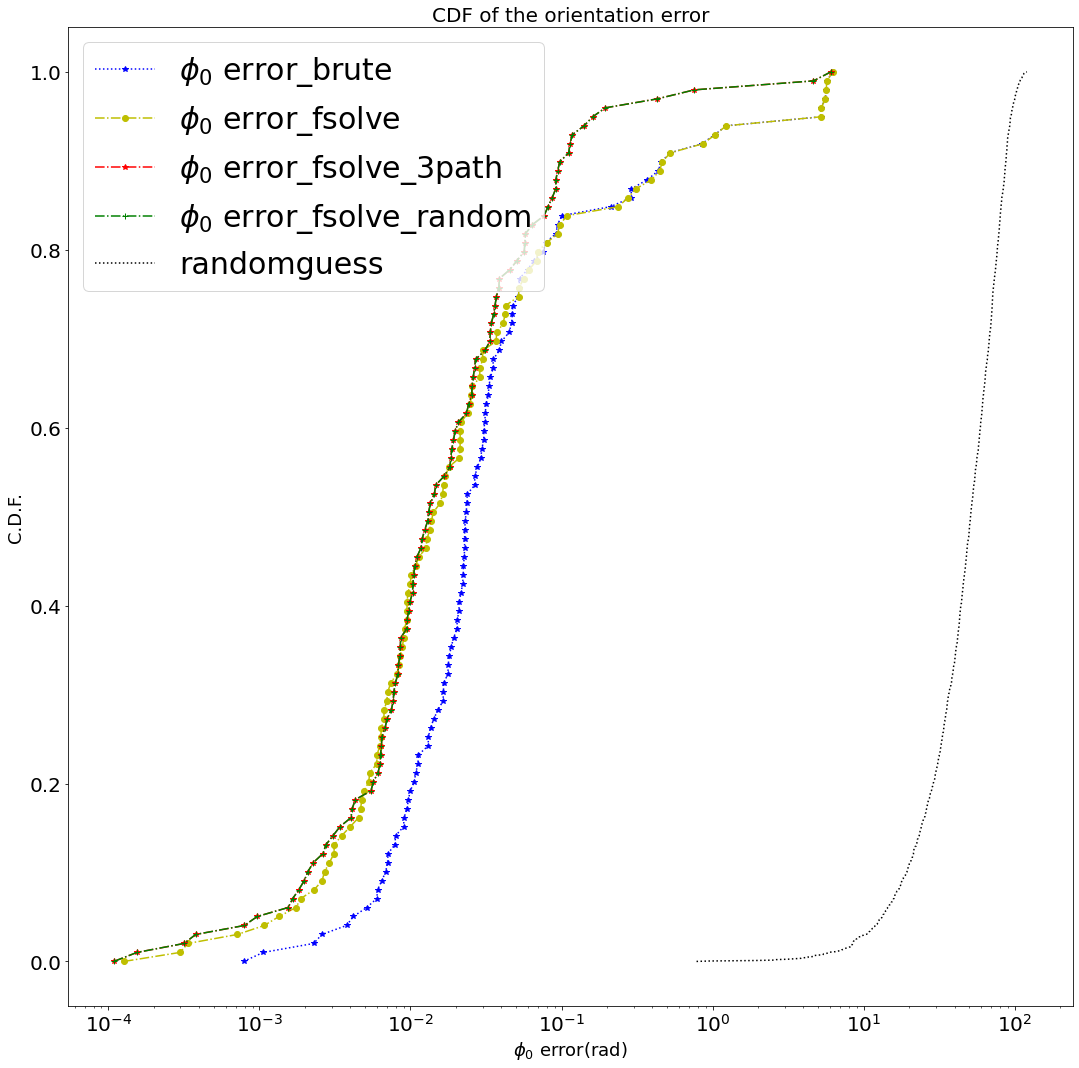

In [43]:
plt.figure(7)

error_brute = np.sqrt(np.abs(phi0_brute - phi_0)**2)
error_fsolve = np.sqrt(np.abs(phi0_drop1 - phi_0)**2)
error_fsolve_3path = np.sqrt(np.abs(phi0_3path - phi_0)**2)
error_fsolve_random = np.sqrt(np.abs(phi0_random - phi_0)**2)

plt.semilogx(np.sort(error_brute).T, np.linspace(0,1,error_brute.size), ':b*', label="$\phi_0$ error_brute")
plt.semilogx(np.sort(error_fsolve).T,np.linspace(0,1,error_fsolve.size),'-.oy', label="$\phi_0$ error_fsolve")
plt.semilogx(np.sort(error_fsolve_3path).T,np.linspace(0,1,error_fsolve_3path.size),'-.r*', label="$\phi_0$ error_fsolve_3path")
plt.semilogx(np.sort(error_fsolve_random).T,np.linspace(0,1,error_fsolve_random.size),'-.g+', label="$\phi_0$ error_fsolve_random")
plt.semilogx(np.sort(error_dumb).T, np.linspace(0,1,error_dumb.size),':k', label="randomguess")

plt.title("CDF of the orientation error",  fontsize=20)
plt.xlabel('$\phi_0$ error(rad)', fontsize=18)
plt.ylabel('C.D.F.', fontsize=18)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 30})

# Save CDF_loc_error image
plt.savefig(Folder_tutorial_2_dir_path + "/CDF_phi0_error.png")

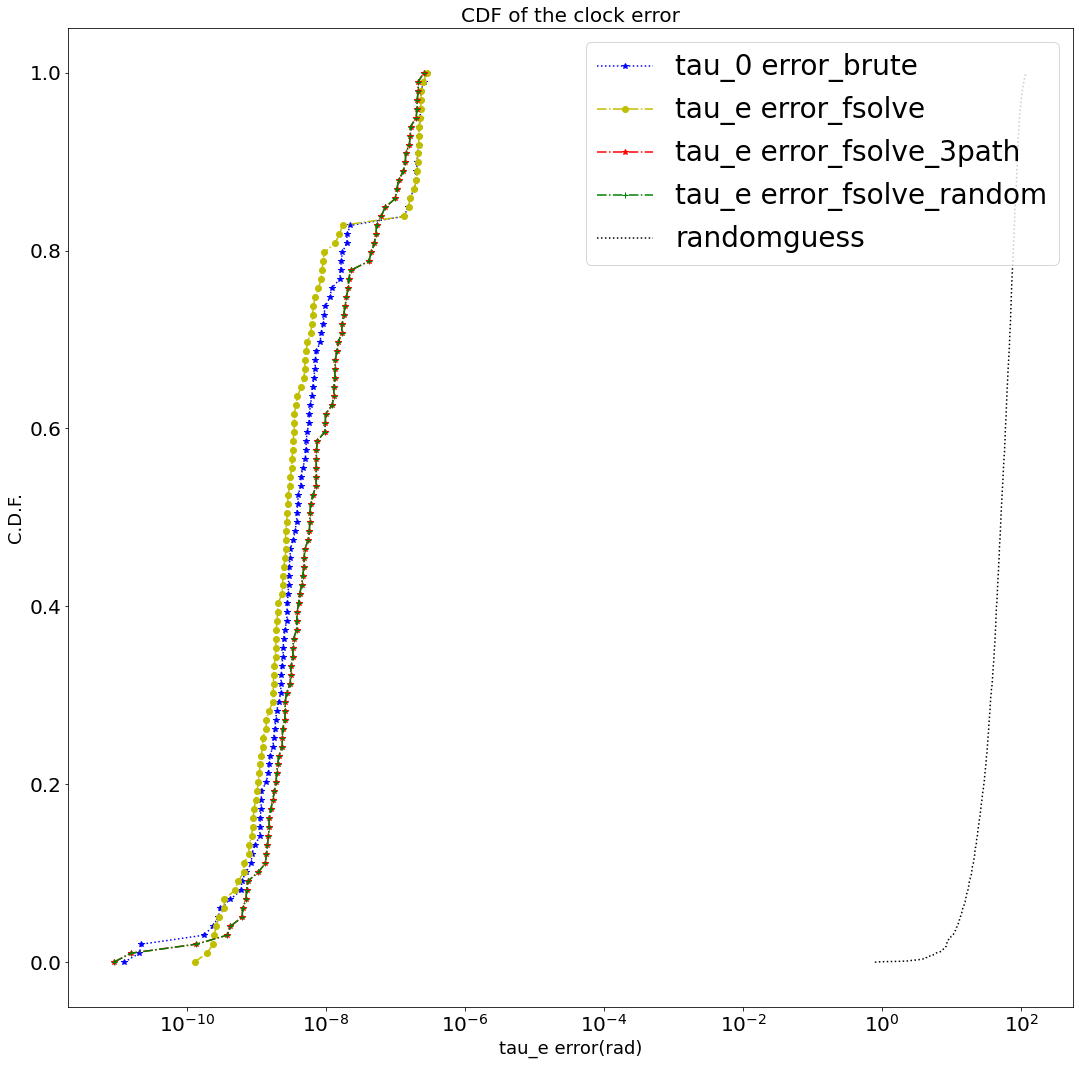

In [44]:
plt.figure(8)

error_brute = np.sqrt(np.abs(tauerr_brute - clock_error)**2)
error_fsolve = np.sqrt(np.abs(tauerr_drop1 - clock_error)**2)
error_fsolve_3path = np.sqrt(np.abs(tauerr_3path - clock_error)**2)
error_fsolve_random = np.sqrt(np.abs(tauerr_random - clock_error)**2)

plt.semilogx(np.sort(error_brute).T, np.linspace(0,1,error_brute.size), ':b*', label="tau_0 error_brute")
plt.semilogx(np.sort(error_fsolve).T,np.linspace(0,1,error_fsolve.size),'-.oy', label="tau_e error_fsolve")
plt.semilogx(np.sort(error_fsolve_3path).T,np.linspace(0,1,error_fsolve_3path.size),'-.r*', label="tau_e error_fsolve_3path")
plt.semilogx(np.sort(error_fsolve_random).T,np.linspace(0,1,error_fsolve_random.size),'-.g+', label="tau_e error_fsolve_random")
plt.semilogx(np.sort(error_dumb).T, np.linspace(0,1,error_dumb.size),':k', label="randomguess")

plt.title("CDF of the clock error",  fontsize=20)
plt.xlabel('tau_e error(rad)', fontsize=18)
plt.ylabel('C.D.F.', fontsize=18)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 28}, loc="upper right")

# Save CDF_loc_error image
plt.savefig(Folder_tutorial_2_dir_path + "/CDF_taue_error.png")

In [45]:
def gen1PathGroup(Npath):
        table_group = np.empty((Npath, Npath), dtype=bool)

        for gr in range(Npath):
            path_indices = [gr]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [46]:
table_group_1path = gen1PathGroup(20)
table_group_19path = np.invert(table_group_1path)

In [47]:
def gen2PathGroup(Npath):
        table_group = np.empty((Npath-1, Npath), dtype=bool)

        for gr in range(Npath-1):
            path_indices = [gr, gr+1]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [48]:
table_group_2path = gen2PathGroup(20)
table_group_18path = np.invert(table_group_2path)

In [49]:
table_group_3path = loc.gen3PathGroup(20)
table_group_17path = np.invert(table_group_3path)

In [50]:
def gen4PathGroup(Npath):
        table_group = np.empty((Npath-3, Npath), dtype=bool)

        for gr in range(Npath-3):
            path_indices = [gr, gr+1, gr+2, gr+3]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [51]:
table_group_4path = gen4PathGroup(20)
table_group_16path = np.invert(table_group_4path)

In [52]:
def gen5PathGroup(Npath):
        table_group = np.empty((Npath-4, Npath), dtype=bool)

        for gr in range(Npath-4):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [53]:
table_group_5path = gen5PathGroup(20)
table_group_15path = np.invert(table_group_5path)

In [54]:
def gen6PathGroup(Npath):
        table_group = np.empty((Npath-5, Npath), dtype=bool)

        for gr in range(Npath-5):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4, gr+5]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [55]:
table_group_6path = gen6PathGroup(20)
table_group_14path = np.invert(table_group_6path)

In [56]:
def gen7PathGroup(Npath):
        table_group = np.empty((Npath-6, Npath), dtype=bool)

        for gr in range(Npath-6):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4, gr+5, gr+6]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [57]:
table_group_7path = gen7PathGroup(20)
table_group_13path = np.invert(table_group_7path)

In [58]:
def gen8PathGroup(Npath):
        table_group = np.empty((Npath-7, Npath), dtype=bool)

        for gr in range(Npath-7):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4, gr+5, gr+6, gr+7]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [59]:
table_group_8path = gen8PathGroup(20)
table_group_12path = np.invert(table_group_8path)

In [60]:
def gen9PathGroup(Npath):
        table_group = np.empty((Npath-8, Npath), dtype=bool)

        for gr in range(Npath-8):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4, gr+5, gr+6, gr+7, gr+8]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [61]:
table_group_9path = gen9PathGroup(20)
table_group_11path = np.invert(table_group_9path)

In [62]:
def gen10PathGroup(Npath):
        table_group = np.empty((Npath-9, Npath), dtype=bool)

        for gr in range(Npath-9):
            path_indices = [gr, gr+1, gr+2, gr+3, gr+4, gr+5, gr+6, gr+7, gr+8, gr+9]
            table_group[gr,:] = np.isin(np.arange(Npath), path_indices)        
        
        return table_group

In [63]:
table_group_10path = gen10PathGroup(20)

In [64]:
phi0_1est = np.zeros((1,Nuser))
phi0_2est = np.zeros((1,Nuser))
phi0_3est = np.zeros((1,Nuser))
phi0_4est = np.zeros((1,Nuser))
phi0_5est = np.zeros((1,Nuser))
phi0_6est = np.zeros((1,Nuser))
phi0_7est = np.zeros((1,Nuser))
phi0_8est = np.zeros((1,Nuser))
phi0_9est = np.zeros((1,Nuser))
phi0_10est = np.zeros((1,Nuser))
phi0_11est = np.zeros((1,Nuser))
phi0_12est = np.zeros((1,Nuser))
phi0_14est = np.zeros((1,Nuser))
phi0_16est = np.zeros((1,Nuser))
phi0_18est = np.zeros((1,Nuser))
phi0_19est = np.zeros((1,Nuser))

tauerr_1path = np.zeros((1,Nuser))
tauerr_2path = np.zeros((1,Nuser))
tauerr_3path = np.zeros((1,Nuser))
tauerr_4path = np.zeros((1,Nuser))
tauerr_5path = np.zeros((1,Nuser))
tauerr_6path = np.zeros((1,Nuser))
tauerr_7path = np.zeros((1,Nuser))
tauerr_8path = np.zeros((1,Nuser))
tauerr_9path = np.zeros((1,Nuser))
tauerr_10path = np.zeros((1,Nuser))
tauerr_11path = np.zeros((1,Nuser))
tauerr_12path = np.zeros((1,Nuser))
tauerr_14path = np.zeros((1,Nuser))
tauerr_16path = np.zeros((1,Nuser))
tauerr_18path = np.zeros((1,Nuser))
tauerr_19path = np.zeros((1,Nuser))

d_0x_est = np.zeros((1,Nuser))
d_0y_est = np.zeros((1,Nuser))

plt.figure(8)

#
t_start = time.time()

bar = Bar("fsolve_1path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_1est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_1path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_1path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_1path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_1path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_1path).T,np.linspace(0,1,error_fsolve_1path.size),'-.or', label="fsolve_1path")

#
t_start = time.time()

bar = Bar("fsolve_2path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_2est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_2path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_2path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_2path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_2path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_2path).T,np.linspace(0,1,error_fsolve_2path.size),'-.or', label="fsolve_2path")

#
t_start = time.time()

bar = Bar("fsolve_3path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_3est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_3path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method="3path", RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_3path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_3path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_3path).T,np.linspace(0,1,error_fsolve_3path.size),'-.or', label="fsolve_3path")

#
t_start = time.time()

bar = Bar("fsolve_4path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_4est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_4path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_4path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_4path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_4path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_4path).T,np.linspace(0,1,error_fsolve_4path.size),'-.y*', label="fsolve_4path")

#
t_start = time.time()

bar = Bar("fsolve_5path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_5est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_5path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_5path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_5path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_5path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_5path).T,np.linspace(0,1,error_fsolve_5path.size),'-.or', label="fsolve_5path")

#
t_start = time.time()
bar = Bar("fsolve_6path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_6est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_6path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_6path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_6path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_6path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_6path).T,np.linspace(0,1,error_fsolve_6path.size),'-.mo', label="fsolve_6path")

#
t_start = time.time()

bar = Bar("fsolve_7path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_7est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_7path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_7path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_7path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_7path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_7path).T,np.linspace(0,1,error_fsolve_7path.size),'-.or', label="fsolve_7path")

#
t_start = time.time()

bar = Bar("fsolve_8path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_8est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_8path[:,ue] , _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_8path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_8path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_8path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_8path).T,np.linspace(0,1,error_fsolve_8path.size),'-.+', label="fsolve_8path")

#
t_start = time.time()

bar = Bar("fsolve_9path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_9est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_9path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_9path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_9path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_9path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_9path).T,np.linspace(0,1,error_fsolve_9path.size),'-.or', label="fsolve_9path")

#
t_start = time.time()

bar = Bar("fsolve_10path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_10est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_10path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_10path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_10path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_10path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_10path).T,np.linspace(0,1,error_fsolve_10path.size),'-.or', label="fsolve_10path")

#
t_start = time.time()

bar = Bar("fsolve_11path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_11est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_11path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_11path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_11path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_11path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_11path).T,np.linspace(0,1,error_fsolve_11path.size),'-.or', label="fsolve_11path")

#
t_start = time.time()

bar = Bar("fsolve_12path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_12est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_12path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_12path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_12path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_12path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_12path).T,np.linspace(0,1,error_fsolve_12path.size),'-.or', label="fsolve_12path")

#
t_start = time.time()

bar = Bar("fsolve_14path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_14est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_14path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_14path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_14path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_14path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_14path).T,np.linspace(0,1,error_fsolve_14path.size),'-.or', label="fsolve_14path")

#
t_start = time.time()

bar = Bar("fsolve_16path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_16est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_16path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_16path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_16path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_16path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_16path).T,np.linspace(0,1,error_fsolve_16path.size),'-.or', label="fsolve_14path")

#
t_start = time.time()

bar = Bar("fsolve_18path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_18est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_18path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method=table_group_18path, RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_18path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_18path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_18path).T,np.linspace(0,1,error_fsolve_18path.size),'-.or', label="fsolve_18path")

#
t_start = time.time()

bar = Bar("fsolve_19path", max=Nuser)
bar.check_tty = False

for ue in range(Nuser):
    (phi0_19est[:,ue], d_0x_est[:,ue], d_0y_est[:,ue], tauerr_19path[:,ue], _, _,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], hint_phi0=None, phi0_method="fsolve", group_method="drop1", RootMethod = "lm") 
    bar.next()
bar.finish()

error_fsolve_19path = np.sqrt(np.abs(d_0x - d_0x_est)**2 + np.abs(d_0y - d_0y_est))
t_run_fsolve_19path = time.time() - t_start
#plt.semilogx(np.sort(error_fsolve_19path).T,np.linspace(0,1,error_fsolve_19path.size),'-.or', label="fsolve_19path")

#plt.title("CDF of the position error with different number of paths",  fontsize=30)
#plt.xlabel('Position error(m)', fontsize=30)
#plt.ylabel('C.D.F.', fontsize=30)
#plt.xticks(fontsize = 30) 
#plt.yticks(fontsize = 30) 

# Create and avoid label repetitions in the legends
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), prop={"size": 28})

/home/gonzalo/py5g/MultipathLocationEstimator.py:405: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if group_method == '3path':
/home/gonzalo/py5g/MultipathLocationEstimator.py:408: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif group_method == 'drop1':
/home/gonzalo/py5g/MultipathLocationEstimator.py:411: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif group_method == 'random':
fsolve_1path |################################| 100/100
fsolve_2path |################################| 100/100
fsolve_3path |################################| 100/100
fsolve_4path |################################| 100/100
fsolve_5path |################################| 100/100
fsolve_6path |################################| 100/100
fsolve_7path |###############

<Figure size 1296x1296 with 0 Axes>

/tmp/ipykernel_12079/964567547.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


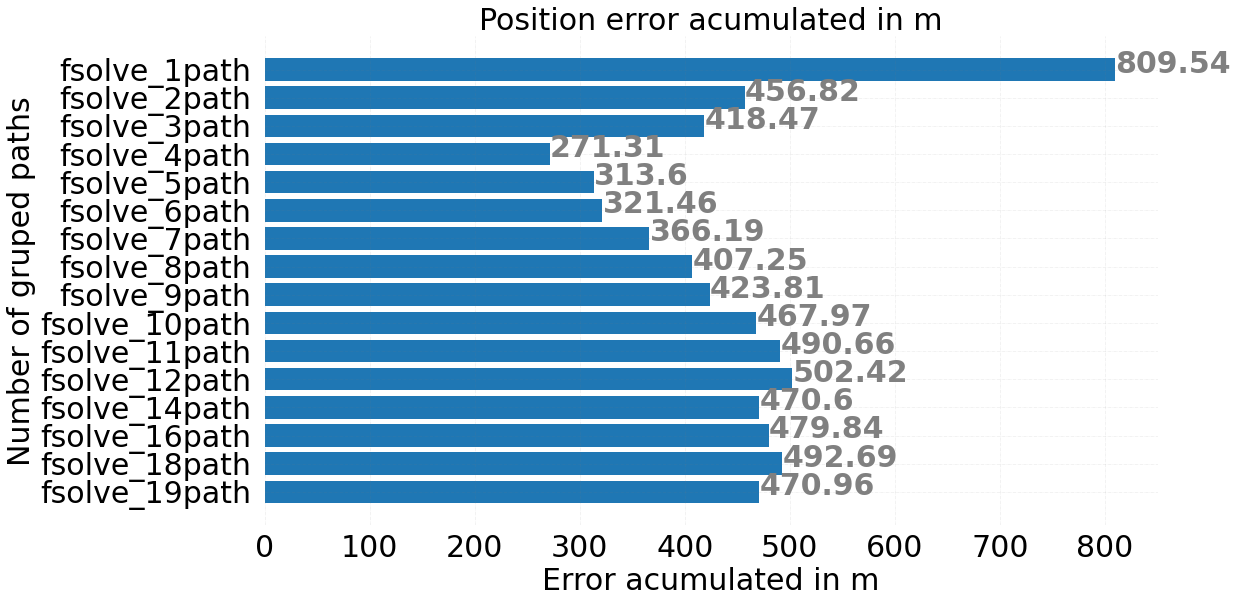

In [65]:
paths = ['fsolve_1path', 'fsolve_2path', 'fsolve_3path', 'fsolve_4path', 'fsolve_5path', 'fsolve_6path', 
         'fsolve_7path', 'fsolve_8path', 'fsolve_9path', 'fsolve_10path', 'fsolve_11path','fsolve_12path',
        'fsolve_14path', 'fsolve_16path', 'fsolve_18path', 'fsolve_19path']

error = [np.sum(error_fsolve_1path), np.sum(error_fsolve_2path), np.sum(error_fsolve_3path), np.sum(error_fsolve_4path),
        np.sum(error_fsolve_5path), np.sum(error_fsolve_6path), np.sum(error_fsolve_7path), np.sum(error_fsolve_8path),
        np.sum(error_fsolve_9path), np.sum(error_fsolve_10path), np.sum(error_fsolve_11path), np.sum(error_fsolve_12path),
        np.sum(error_fsolve_14path), np.sum(error_fsolve_16path), np.sum(error_fsolve_18path), np.sum(error_fsolve_19path)]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(paths, error)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 30, fontweight ='bold',
			color ='grey')

plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 

plt.title("Position error acumulated in m",  fontsize=30)
plt.xlabel("Error acumulated in m",  fontsize=30)
plt.ylabel("Number of gruped paths",  fontsize=30)

plt.savefig(Folder_tutorial_2_dir_path + "/G_paths_position_error.png")

/tmp/ipykernel_12079/3354052635.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


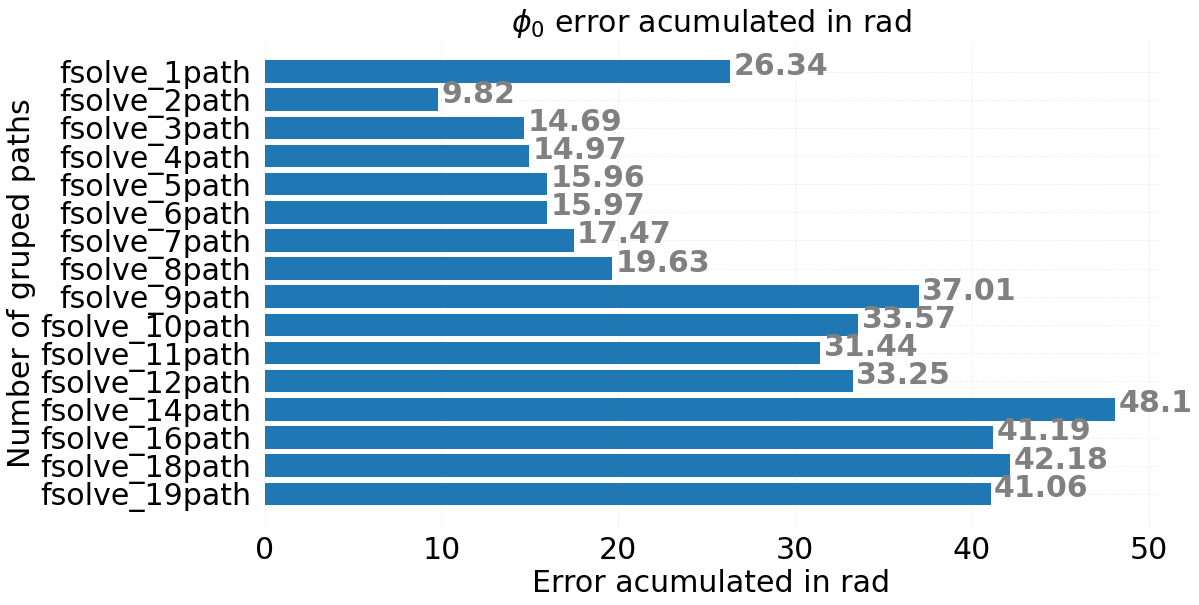

In [66]:
error_fsolve_1path = np.sqrt(np.abs(phi0_1est - phi_0)**2)
error_fsolve_2path = np.sqrt(np.abs(phi0_2est - phi_0)**2)
error_fsolve_3path = np.sqrt(np.abs(phi0_3est - phi_0)**2)
error_fsolve_4path = np.sqrt(np.abs(phi0_4est - phi_0)**2)
error_fsolve_5path = np.sqrt(np.abs(phi0_5est - phi_0)**2)
error_fsolve_6path = np.sqrt(np.abs(phi0_6est - phi_0)**2)
error_fsolve_7path = np.sqrt(np.abs(phi0_7est - phi_0)**2)
error_fsolve_8path = np.sqrt(np.abs(phi0_8est - phi_0)**2)
error_fsolve_9path = np.sqrt(np.abs(phi0_9est - phi_0)**2)
error_fsolve_10path = np.sqrt(np.abs(phi0_10est - phi_0)**2)
error_fsolve_11path = np.sqrt(np.abs(phi0_11est - phi_0)**2)
error_fsolve_12path = np.sqrt(np.abs(phi0_12est - phi_0)**2)
error_fsolve_14path = np.sqrt(np.abs(phi0_14est - phi_0)**2)
error_fsolve_16path = np.sqrt(np.abs(phi0_16est - phi_0)**2)
error_fsolve_18path = np.sqrt(np.abs(phi0_18est - phi_0)**2)
error_fsolve_19path = np.sqrt(np.abs(phi0_19est - phi_0)**2)

error = [np.sum(error_fsolve_1path), np.sum(error_fsolve_2path), np.sum(error_fsolve_3path), np.sum(error_fsolve_4path),
        np.sum(error_fsolve_5path), np.sum(error_fsolve_6path), np.sum(error_fsolve_7path), np.sum(error_fsolve_8path),
        np.sum(error_fsolve_9path), np.sum(error_fsolve_10path), np.sum(error_fsolve_11path), np.sum(error_fsolve_12path),
        np.sum(error_fsolve_14path), np.sum(error_fsolve_16path), np.sum(error_fsolve_18path), np.sum(error_fsolve_19path)]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(paths, error)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 30, fontweight ='bold',
			color ='grey')

plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 

plt.title("$\phi_0$ error acumulated in rad",  fontsize=30)
plt.xlabel("Error acumulated in rad",  fontsize=30)
plt.ylabel("Number of gruped paths",  fontsize=30)

plt.savefig(Folder_tutorial_2_dir_path + "/G_paths_phi0_error.png")

<a class="anchor" id="7"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria"><b> 7. References </b></span>
<br>


[1] Felipe Gomez-Cuba. Multipath absolute clock recovery and location. page 12.

[2] Felipe Gómez-Cuba, Nuria González-Prelcic, and Gonzalo Feijoo Rodríguez. Clock and orientation-robust location and mapping from multipath channel estimation. page 6.